## Adhoc analysis

E. Quinn 1/16/2021

Build people data structure from PDF earnings reports

## Import standard python datascience packages

In [1]:
import sys
import math
import re
import copy as cp
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
#plt.switch_backend('WebAgg')
import seaborn as sns
import pickle
%matplotlib inline

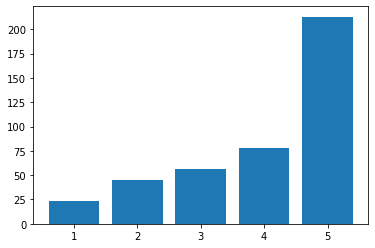

In [2]:
data = [23, 45, 56, 78, 213]
plt.bar([1,2,3,4,5], data)
plt.show()
plt.close()

In [3]:
from datetime import datetime, timedelta, date
from datascience import *
import uuid
import random

In [4]:
sys.path.append("/home/gquinn/EG/school_committee/egsc/py_egsc")

### Import custom SC classes - Bayesian versions

In [5]:
from person import Person
from ucoa_labels import UCOA_labels
from eg_acct_codes import EG_acct_codes
from pay_check import Pay_check, Check_lineitem
from roles_Bayes import *                          #import Bayesian roles.py
from payperiod_Bayes import Payperiod
from forecast import *

### Show the directory we are running in

In [6]:
!pwd

/home/gquinn/EG/school_committee/finance_subcommittee/notebooks


### Load RIDE UCOA labels 

In [7]:
ucoa_labels = UCOA_labels()
#help(ucoa_labels)
ucoa_labels.get_label('Obj','51110')

'Regular Salaries'

### EG accounting codes class

provides descriptions for EG accounting codes and mapping to UCOA codes

In [8]:
eg_acct_codes = EG_acct_codes()
#help(eg_acct_codes)

In [9]:
with open('../../finance_subcommittee/Bayesian_people_2_25_2021.pkl', 'rb') as handle:
    people = pickle.load(handle)

In [10]:
cd = {}

for name in people.keys():
    p = people[name]
    roles = p.get_roles()
    for role_name in roles.keys():
        role = roles[role_name]
        #if (isinstance(role,(Teacher))):
        #if (isinstance(role,(Para))):
        if (isinstance(role,(Facilities))):
        #if (isinstance(role,(Substitutes))):
            print(name)
            pps = role.get_payperiods()
            for syear in sorted(pps.keys()):
                for syseq in sorted(pps[syear].keys()):
                    pp = pps[syear][syseq]
                    chks = pp.get_checks()
                    for chknum in chks.keys():
                        ckdate = chks[chknum].get_date()
                        if ckdate not in cd.keys():
                            cd[ckdate] = 0.0
                        items = chks[chknum].get_items()
                        for i in sorted(items.keys()):
                            stepinfo = items[i].get_stepinfo()
                            if 'hours' in stepinfo.keys():
                                cd[ckdate] += stepinfo['hours']
cd

WILMARTH, ROBERT J
ALVES, CHERYL A
DEROSA, DONALD
ISIBEL, DAVID R
COOKSON, GARY W
SPENCER, RUSSELL E
SPENCER, RUSSELL E
WADDINGTON, RICHARD S
WADDINGTON, RICHARD S
HARVEY, JOHN C
DAYLOR, JOHN P
ARVIDSON, PAUL H
FEUTI, ROBERT G
FICAZZOLA, RICHARD J
LALLO, MICHAEL V
PARDEE, JAMES R
KURTZ, ROBERT M
SHELDON, DAVID A
COUTU, ROBERT N
PETRANGELO, ANTHONY A
BLACK, ROBERT F
BLACK, ROBERT F
APICI, RALPH O
ORR, RANDY Q
ORR, RANDY Q
SJOGREN, RUSSELL E
GOLDING, CLINTON A
GOLDING, CLINTON A
PICARD, CHARLES E
MACHON, JOSEPH M
MACHON, JOSEPH M
TELLA, GLENN M
TELLA, GLENN M
CLEARY, EDWARD
CLEARY, EDWARD
CLEARY, EDWARD
DWANE, DANIEL E
BALLOU, KIMBERLY A
BYRNE, JAMES M
BYRNE, JAMES M
BYRNE, JAMES M
LALLO, ANDREW B
LOZOWSKI, BRANDON J
CARLSON, ROBERT J
COTE, CHRIS
ALLIN, MATTHEW J
ALLIN, MATTHEW J
DELSANTO, DEBRA A
HARNED, DEBORAH C
SILVA, MARIO J
SPAHR, RICHARD L
CARNEY, MICHAEL C
CARNEY, MICHAEL C
LASALLE, NICHOLAS
LASALLE, NICHOLAS
FONSECA, RAYMOND
FONSECA, RAYMOND
FOURNIER, DAVID P
ROBITAILLE, STEVEN 

{datetime.date(2014, 7, 11): 1863.2500000000005,
 datetime.date(2014, 7, 25): 1853.0,
 datetime.date(2014, 8, 8): 1876.5,
 datetime.date(2014, 8, 22): 1854.0,
 datetime.date(2014, 9, 5): 1912.0,
 datetime.date(2014, 9, 19): 1835.4999999999998,
 datetime.date(2014, 10, 3): 1851.0,
 datetime.date(2014, 10, 17): 1834.0,
 datetime.date(2014, 10, 31): 1881.2499999999998,
 datetime.date(2014, 11, 14): 1979.0,
 datetime.date(2014, 11, 28): 1895.75,
 datetime.date(2014, 12, 12): 1889.5,
 datetime.date(2014, 12, 26): 1994.75,
 datetime.date(2015, 1, 9): 1853.75,
 datetime.date(2015, 1, 23): 1994.0,
 datetime.date(2015, 2, 6): 1988.5,
 datetime.date(2015, 2, 20): 2026.0,
 datetime.date(2015, 3, 6): 2065.5,
 datetime.date(2015, 3, 20): 2028.0,
 datetime.date(2015, 4, 3): 1995.0,
 datetime.date(2015, 4, 17): 1960.0,
 datetime.date(2015, 5, 1): 1990.0,
 datetime.date(2015, 5, 15): 1982.25,
 datetime.date(2015, 5, 29): 1961.5,
 datetime.date(2015, 6, 12): 1922.0,
 datetime.date(2015, 6, 26): 1896.25

In [12]:
cd = {}

for name in people.keys():
    p = people[name]
    roles = p.get_roles()
    for role_name in roles.keys():
        role = roles[role_name]
        #if (isinstance(role,(Teacher))):
        #if (isinstance(role,(Para))):
        if (isinstance(role,(Facilities))):
        #if (isinstance(role,(Substitutes))):
        #if (name == 'WILMARTH, ROBERT J'):
        #if (role_name == 'FACILTY DR'):
            pps = role.get_payperiods()
            for syear in sorted(pps.keys()):
                if (syear in ('2013-2014','2014-2015','2015-2016','2016-2017','2017-2018','2018-2019','2019-2020')):
                    for syseq in sorted(pps[syear].keys()):
                        pp = pps[syear][syseq]
                        chks = pp.get_checks()
                        for chknum in chks.keys():
                            ckdate = chks[chknum].get_date()
                            #if ckdate not in cd.keys():
                            #    cd[ckdate] = 0.0
                            items = chks[chknum].get_items()
                            for i in sorted(items.keys()):
                                payment_type = items[i].get_payment_type()
                                stepinfo = items[i].get_stepinfo()
                                if ('hours' in stepinfo.keys()):
                                    if ('OT' in stepinfo.keys()):
                                        if (stepinfo['OT'] == True):
                                            #if (ckdate > date(2020,1,1)):
                                            if (syear == '2019-2020'):
                                                if name not in cd.keys():
                                                    cd[name] = {}
                                                    cd[name]['role'] = role_name
                                                    cd[name]['hours'] = 0.0
                                                    cd[name]['step'] = stepinfo['step']
                                            #    print(ckdate,payment_type,syear)
                                                #print(name)
                                                #items[i].print()
                                                cd[name]['hours'] += stepinfo['hours']
cd

{'ALVES, CHERYL A': {'role': 'CUSTODIAN',
  'hours': 147.0,
  'step': '2018-2019-5'},
 'ISIBEL, DAVID R': {'role': 'CUSTODIAN',
  'hours': 12.0,
  'step': '2018-2019-5'},
 'COOKSON, GARY W': {'role': 'CUSTODIAN',
  'hours': 63.5,
  'step': '2018-2019-5'},
 'WADDINGTON, RICHARD S': {'role': 'CUSTODIAN',
  'hours': 286.5,
  'step': '2018-2019-0'},
 'DAYLOR, JOHN P': {'role': 'CUSTODIAN',
  'hours': 261.5,
  'step': '2018-2019-0'},
 'ARVIDSON, PAUL H': {'role': 'CUSTODIAN',
  'hours': 88.5,
  'step': '2018-2019-0'},
 'FICAZZOLA, RICHARD J': {'role': 'CUSTODIAN',
  'hours': 46.0,
  'step': '2018-2019-5'},
 'LALLO, MICHAEL V': {'role': 'CUSTODIAN',
  'hours': 323.5,
  'step': '2018-2019-5'},
 'PARDEE, JAMES R': {'role': 'CUSTODIAN',
  'hours': 306.5,
  'step': '2018-2019-5'},
 'SHELDON, DAVID A': {'role': 'CUSTODIAN',
  'hours': 27.0,
  'step': '2018-2019-5'},
 'BLACK, ROBERT F': {'role': 'MAINTENANC',
  'hours': 88.0,
  'step': '2018-2019-1'},
 'ORR, RANDY Q': {'role': 'CUSTODIAN', 'hours'

In [ ]:
fe = []
xa = []
for cdate in sorted(cd.keys()):
    fe.append(cd[cdate])
    xa.append(str(cdate))

tuple(xa)

In [ ]:
objects = tuple(xa)
y_pos = np.arange(len(objects))
performance = fe

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.ylabel('Payperiod Ending')
plt.title('Hours')

plt.show()
plt.close()

In [26]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

fe = []
xa = []
for cdate in sorted(cd.keys()):
    fe.append(cd[cdate])
    xa.append(str(cdate))

#objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
objects = tuple(xa)
print(type(objects))
y_pos = np.arange(len(objects))
#performance = [10,8,6,4,2,1]
performance = fe

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Usage')
plt.title('Programming language usage')

#plt.show()
plt.savefig("mygraph.png")

<class 'tuple'>


In [ ]:
import matplotlib.pyplot as plt; #plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

fe = []
xa = []


for cdate in sorted(cd.keys()):
    fe.append(cd[cdate])
    xa.append(cdate)

print(fe)
print(xa)
print(x)
#x = np.arange(len(fe))

plt.barh(x, fe, align='center', alpha=0.5)
#plt.xticks(xa)
plt.ylabel('Hours')
plt.xlabel('Payperiod')
plt.title('Facilities Hours')

#plt.show()
plt.savefig("mygraph.png")

In [12]:
!pwd

/home/gquinn/EG/school_committee/finance_subcommittee/notebooks


In [20]:
plt.get_backend()

'agg'

In [ ]:
ptyp = {}

totamt = 0.0

for name in people.keys():
    p = people[name]
    roles = p.get_roles()
    for role_name in roles.keys():
        role = roles[role_name]
        #if (isinstance(role,(Teacher))):
        #if (isinstance(role,(Para))):
        if (isinstance(role,(Facilities))):
        #if (isinstance(role,(Custodian_PT))):
        #if (isinstance(role,(Substitutes))):
            pps = role.get_payperiods()
            for syear in sorted(pps.keys()):
                for syseq in sorted(pps[syear].keys()):
                    pp = pps[syear][syseq]
                    chks = pp.get_checks()
                    for chknum in chks.keys():
                        cdate = chks[chknum].get_date()
                        items = chks[chknum].get_items()
                        for i in sorted(items.keys()):
                            payment_type = items[i].get_payment_type()
                            earnings = items[i].get_earnings()
                            if payment_type not in ptyp.keys():
                                ptyp[payment_type] = 0.0
                            ptyp[payment_type] += earnings
                            totamt += earnings
                            
print(totamt)

ptyp

In [ ]:
ptyp = {}

totamt = 0.0

for name in people.keys():
    p = people[name]
    roles = p.get_roles()
    for role_name in roles.keys():
        role = roles[role_name]
        #if (isinstance(role,(Teacher))):
        #if (isinstance(role,(Para))):
        if (isinstance(role,(Facilities))):
        #if (isinstance(role,(Custodian_PT))):
        #if (isinstance(role,(Substitutes))):
            pps = role.get_payperiods()
            for syear in sorted(pps.keys()):
                for syseq in sorted(pps[syear].keys()):
                    pp = pps[syear][syseq]
                    chks = pp.get_checks()
                    for chknum in chks.keys():
                        cdate = chks[chknum].get_date()
                        items = chks[chknum].get_items()
                        for i in sorted(items.keys()):
                            payment_type = items[i].get_payment_type()
                            earnings = items[i].get_earnings()
                            if payment_type not in ptyp.keys():
                                ptyp[payment_type] = 0.0
                            ptyp[payment_type] += earnings
                            totamt += earnings
                            
print(totamt)

ptyp

In [12]:
ptyp = {}

for name in people.keys():
    p = people[name]
    roles = p.get_roles()
    for role_name in roles.keys():
        role = roles[role_name]
        #if (isinstance(role,(Teacher))):
        #if (isinstance(role,(Para))):
        if (isinstance(role,(Facilities))):
        #if (isinstance(role,(Substitutes))):
            pps = role.get_payperiods()
            for syear in sorted(pps.keys()):
                if syear not in ptyp.keys():
                    ptyp[syear]={}
                for syseq in sorted(pps[syear].keys()):
                    pp = pps[syear][syseq]
                    chks = pp.get_checks()
                    for chknum in chks.keys():
                        cdate = chks[chknum].get_date()
                        items = chks[chknum].get_items()
                        for i in sorted(items.keys()):
                            payment_type = items[i].get_payment_type()
                            rate = items[i].get_rate()
                            if (payment_type == 'Other or unknown'):
                                if (cdate == date(2018,1,5)):
                                    print(name,role_name,cdate,rate)
                                    items[i].print()

In [ ]:
ptyp = {}

totunk = 0.0
totexp = 0.0
ctunk = 0

for name in people.keys():
    p = people[name]
    roles = p.get_roles()
    for role_name in roles.keys():
        role = roles[role_name]
        #if (isinstance(role,(Teacher))):
        #if (isinstance(role,(Para))):
        if (isinstance(role,(Facilities))):
        #if (isinstance(role,(Substitutes))):
        #if (isinstance(role,(Appendix_B))):
            pps = role.get_payperiods()
            for syear in sorted(pps.keys()):
                for syseq in sorted(pps[syear].keys()):
                    pp = pps[syear][syseq]
                    chks = pp.get_checks()
                    for chknum in chks.keys():
                        ckdate = chks[chknum].get_date()
                        items = chks[chknum].get_items()
                        for i in sorted(items.keys()):
                            totexp += items[i].get_earnings()
                            rate = items[i].get_rate()
                            obj = items[i].get_obj()
                            payment_type = items[i].get_payment_type()
                            if (payment_type == 'Other or unknown'):
                                totunk += items[i].get_earnings()
                                #if (obj == '20430'):
                                print(name,role_name,ckdate,obj,rate)
                                items[i].print()
                                ctunk +=1
                                
print(totexp,ctunk,totunk)

ptyp

In [ ]:
ptyp = {}

totunk = 0.0
totexp = 0.0
ctunk = 0

for name in people.keys():
    p = people[name]
    roles = p.get_roles()
    for role_name in roles.keys():
        role = roles[role_name]
        #if (isinstance(role,(Teacher))):
        #if (isinstance(role,(Para))):
        if (isinstance(role,(Facilities))):
        #if (isinstance(role,(Substitutes))):
        #if (isinstance(role,(Appendix_B))):
            pps = role.get_payperiods()
            for syear in sorted(pps.keys()):
                for syseq in sorted(pps[syear].keys()):
                    pp = pps[syear][syseq]
                    chks = pp.get_checks()
                    for chknum in chks.keys():
                        ckdate = chks[chknum].get_date()
                        items = chks[chknum].get_items()
                        for i in sorted(items.keys()):
                            totexp += items[i].get_earnings()
                            payment_type = items[i].get_payment_type()
                            rate = items[i].get_rate()
                            if (rate > 0.0):
                                if (payment_type == 'Other or unknown'):
                                    totunk += items[i].get_earnings()
                                    print(name,ckdate,rate)
                                    items[i].print()
                                    ctunk +=1
                                
print(totexp,ctunk,totunk)

ptyp

In [ ]:
ptyp = {}

totunk = 0

for name in people.keys():
    p = people[name]
    roles = p.get_roles()
    for role_name in roles.keys():
        role = roles[role_name]
        if (True):
        #if (isinstance(role,(Teacher))):
        #if (isinstance(role,(Para))):
        #if (isinstance(role,(Facilities))):
        #if (isinstance(role,(Substitutes))):
        #if (isinstance(role,(Appendix_B))):
            pps = role.get_payperiods()
            for syear in sorted(pps.keys()):
                for syseq in sorted(pps[syear].keys()):
                    pp = pps[syear][syseq]
                    chks = pp.get_checks()
                    for chknum in chks.keys():
                        ckdate = chks[chknum].get_date()
                        items = chks[chknum].get_items()
                        for i in sorted(items.keys()):
                            items[i].print()
                    
                        

In [ ]:
ptyp = {}

for name in people.keys():
    p = people[name]
    roles = p.get_roles()
    for role_name in roles.keys():
        role = roles[role_name]
        #if (isinstance(role,(Teacher))):
        #if (isinstance(role,(Para))):
        #if (isinstance(role,(Facilities))):
        if (isinstance(role,(Appendix_B))):
            pps = role.get_payperiods()
            for syear in sorted(pps.keys()):
                for syseq in sorted(pps[syear].keys()):
                    pp = pps[syear][syseq]
                    chks = pp.get_checks()
                    for chknum in chks.keys():
                        items = chks[chknum].get_items()
                        for i in sorted(items.keys()):
                            payment_type = items[i].get_payment_type()
                            earnings = items[i].get_earnings()
                            if payment_type not in ptyp.keys():
                                ptyp[payment_type] = 0.0
                            ptyp[payment_type] += earnings

totamt = 0.0

for pt in ptyp.keys():
    totamt += ptyp[pt]
    
for pt in ptyp.keys():
    pct = 100*ptyp[pt]/totamt
    print(pt,ptyp[pt],pct)
    
